## Multivariate Regression

In [1]:
require(datasets)
data(swiss)
?swiss

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socio-economic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  Fertility         Ig,‘common standardized fertility measure’      
                                                                               
       [,2]  Agriculture       % of males involved in agriculture 
                               as occupation 
       [,3]  Examination       % draftees receiving highest mark 
                               on army examination 
       [,4]  Education         % education beyond primary school for draftees. 
       [,5]  Catholic          % ‘catholic’ (as opposed to ‘protestant’).      
       [,6]  Infant.Mortality  live births who live less than 1year.           
      
     All variables but ‘Fertility’ give proportions of the population.

_D_e_t_a_i_l_s:

     (paraphrasing Mosteller and Tukey):

     Switzerland, in 1888, was entering a period known as the
     _demographic transition_; i.e., its fertility was beginning to
     fall from the high level typical of underdeveloped countries.

     The data collected are for 47 French-speaking “provinces” at about
     1888.

     Here, all variables are scaled to [0, 100], where in the original,
     all but ‘"Catholic"’ were scaled to [0, 1].

_N_o_t_e:

     Files for all 182 districts in 1888 and other years have been
     available at <URL:
     https://opr.princeton.edu/archive/pefp/switz.aspx>.

     They state that variables ‘Examination’ and ‘Education’ are
     averages for 1887, 1888 and 1889.

_S_o_u_r_c_e:

     Project “16P5”, pages 549-551 in

     Mosteller, F. and Tukey, J. W. (1977) _Data Analysis and
     Regression: A Second Course in Statistics_.  Addison-Wesley,
     Reading Mass.

     indicating their source as “Data used by permission of Franice van
     de Walle. Office of Population Research, Princeton University,
     1976.  Unpublished data assembled under NICHD contract number No
     1-HD-O-2077.”

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(swiss, panel = panel.smooth, main = "swiss data",
           col = 3 + (swiss$Catholic > 50))
     summary(lm(Fertility ~ . , data = swiss))

In [3]:
library(GGally)
library(ggplot2)
g <- NULL
g <- ggpairs(swiss
            , lower = list(continuous = 'smooth')
            , params = c(method = 'loess')
            )
g

ERROR: Error in stop_if_params_exist(params): 'params' is a deprecated argument.  Please 'wrap' the function to supply arguments. help("wrap", package = "GGally")


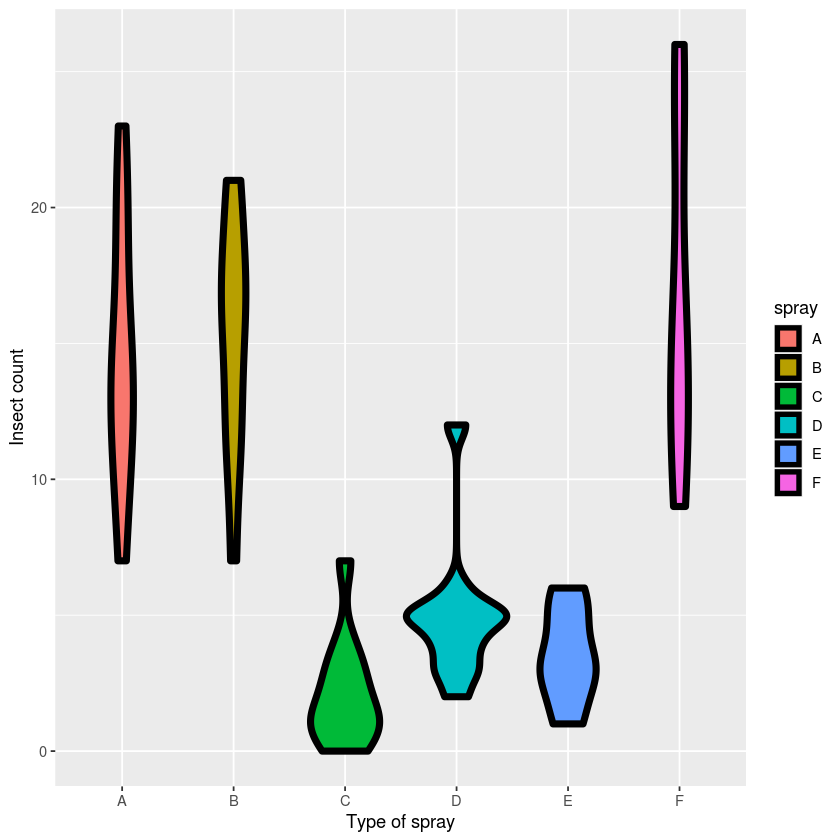

In [6]:
require(stats)
require(datasets)
data(InsectSprays)
g <- NULL;
g <- ggplot(data = InsectSprays, aes(y = count, x = spray, fill = spray))
g <- g + geom_violin(color = "black", size = 2)
g <- g + xlab("Type of spray") + ylab("Insect count")
g

In [7]:
head(InsectSprays)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


- **Intercept: mean of spray A**
- **Coefficient**: e.g. coef(spraC)=-12.42 means the difference between spray C - spray A

In [9]:
fit <- lm(count~spray, data = InsectSprays)
fit_sum <- summary(fit)
fit_sum


Call:
lm(formula = count ~ spray, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.5000     1.1322  12.807  < 2e-16 ***
sprayB        0.8333     1.6011   0.520    0.604    
sprayC      -12.4167     1.6011  -7.755 7.27e-11 ***
sprayD       -9.5833     1.6011  -5.985 9.82e-08 ***
sprayE      -11.0000     1.6011  -6.870 2.75e-09 ***
sprayF        2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


In [12]:
fit2 <- lm(count ~ I(1 * (spray == "B")) + I(1 * (spray == "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * (spray == "F")), data = InsectSprays)
fit2_sum = summary(fit2)
fit2_sum


Call:
lm(formula = count ~ I(1 * (spray == "B")) + I(1 * (spray == 
    "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * 
    (spray == "F")), data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.5000     1.1322  12.807  < 2e-16 ***
I(1 * (spray == "B"))   0.8333     1.6011   0.520    0.604    
I(1 * (spray == "C")) -12.4167     1.6011  -7.755 7.27e-11 ***
I(1 * (spray == "D"))  -9.5833     1.6011  -5.985 9.82e-08 ***
I(1 * (spray == "E")) -11.0000     1.6011  -6.870 2.75e-09 ***
I(1 * (spray == "F"))   2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


In [13]:
## What if we include all 6 factors?
fit3 <- lm(count ~ I(1 * (spray == "B")) + I(1 * (spray == "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * (spray == "F")) + + I(1 * (spray == "A")), data = InsectSprays)
fit3_sum = summary(fit3)
fit3_sum



Call:
lm(formula = count ~ I(1 * (spray == "B")) + I(1 * (spray == 
    "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * 
    (spray == "F")) + +I(1 * (spray == "A")), data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.5000     1.1322  12.807  < 2e-16 ***
I(1 * (spray == "B"))   0.8333     1.6011   0.520    0.604    
I(1 * (spray == "C")) -12.4167     1.6011  -7.755 7.27e-11 ***
I(1 * (spray == "D"))  -9.5833     1.6011  -5.985 9.82e-08 ***
I(1 * (spray == "E")) -11.0000     1.6011  -6.870 2.75e-09 ***
I(1 * (spray == "F"))   2.1667     1.6011   1.353    0.181    
I(1 * (spray == "A"))       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	

In [14]:
## What if we omit the intercept?
fit4 <- lm(count ~ spray - 1, data = InsectSprays)
fit4_sum = summary(fit4)
fit4_sum


Call:
lm(formula = count ~ spray - 1, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
sprayA   14.500      1.132  12.807  < 2e-16 ***
sprayB   15.333      1.132  13.543  < 2e-16 ***
sprayC    2.083      1.132   1.840  0.07024 .  
sprayD    4.917      1.132   4.343 4.95e-05 ***
sprayE    3.500      1.132   3.091  0.00292 ** 
sprayF   16.667      1.132  14.721  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.9003,	Adjusted R-squared:  0.8912 
F-statistic: 99.33 on 6 and 66 DF,  p-value: < 2.2e-16


In [16]:
library(dplyr)
summarize(group_by(InsectSprays, spray), mn = mean(count))

`summarise()` ungrouping output (override with `.groups` argument)



spray,mn
<fct>,<dbl>
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


如果想要改变默认的factor 1作为reference的情况，可以使用`relevel()`命令

In [21]:
spray2 <- relevel(InsectSprays$spray, "C")
#InsectSprays$spray == spray2

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

## ANCOVA

In [24]:
library(datasets)
data(swiss)
?swiss

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socio-economic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  Fertility         Ig,‘common standardized fertility measure’      
                                                                               
       [,2]  Agriculture       % of males involved in agriculture 
                               as occupation 
       [,3]  Examination       % draftees receiving highest mark 
                               on army examination 
       [,4]  Education         % education beyond primary school for draftees. 
       [,5]  Catholic          % ‘catholic’ (as opposed to ‘protestant’).      
       [,6]  Infant.Mortality  live births who live less than 1year.           
      
     All variables but ‘Fertility’ give proportions of the population.

_D_e_t_a_i_l_s:

     (paraphrasing Mosteller and Tukey):

     Switzerland, in 1888, was entering a period known as the
     _demographic transition_; i.e., its fertility was beginning to
     fall from the high level typical of underdeveloped countries.

     The data collected are for 47 French-speaking “provinces” at about
     1888.

     Here, all variables are scaled to [0, 100], where in the original,
     all but ‘"Catholic"’ were scaled to [0, 1].

_N_o_t_e:

     Files for all 182 districts in 1888 and other years have been
     available at <URL:
     https://opr.princeton.edu/archive/pefp/switz.aspx>.

     They state that variables ‘Examination’ and ‘Education’ are
     averages for 1887, 1888 and 1889.

_S_o_u_r_c_e:

     Project “16P5”, pages 549-551 in

     Mosteller, F. and Tukey, J. W. (1977) _Data Analysis and
     Regression: A Second Course in Statistics_.  Addison-Wesley,
     Reading Mass.

     indicating their source as “Data used by permission of Franice van
     de Walle. Office of Population Research, Princeton University,
     1976.  Unpublished data assembled under NICHD contract number No
     1-HD-O-2077.”

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(swiss, panel = panel.smooth, main = "swiss data",
           col = 3 + (swiss$Catholic > 50))
     summary(lm(Fertility ~ . , data = swiss))

In [25]:
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


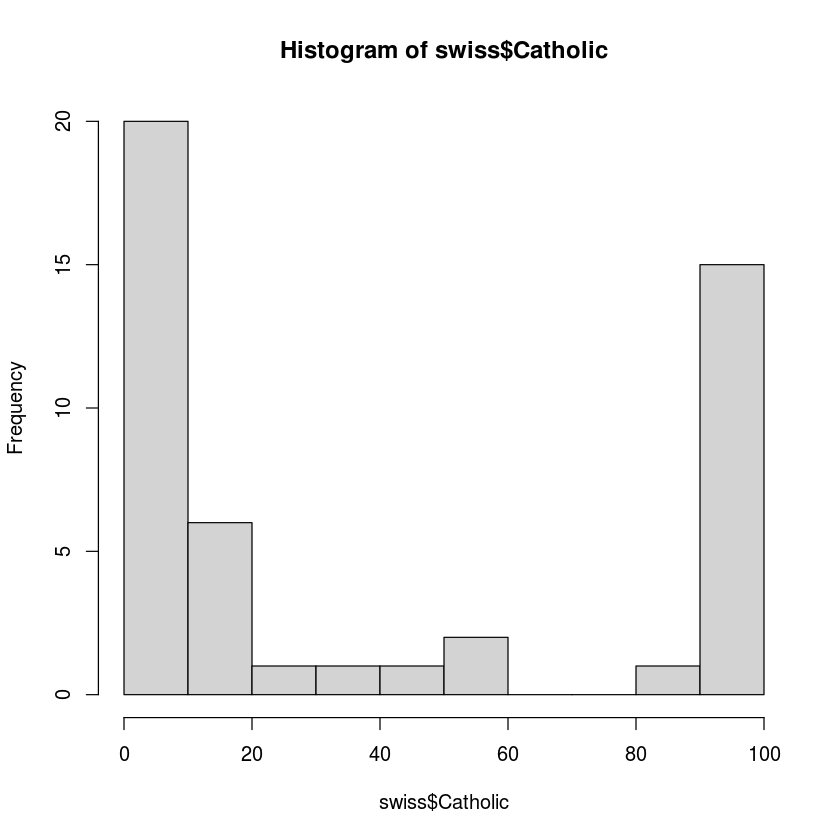

In [23]:
hist(swiss$Catholic)

In [27]:
library(dplyr)
swiss = mutate(swiss, CatholicBin = 1 * (Catholic > 50))
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,CatholicBin
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,80.2,17.0,15,12,9.96,22.2,0
2,83.1,45.1,6,9,84.84,22.2,1
3,92.5,39.7,5,5,93.40,20.2,1
4,85.8,36.5,12,7,33.77,20.3,0
5,76.9,43.5,17,15,5.16,20.6,0
6,76.1,35.3,9,7,90.57,26.6,1


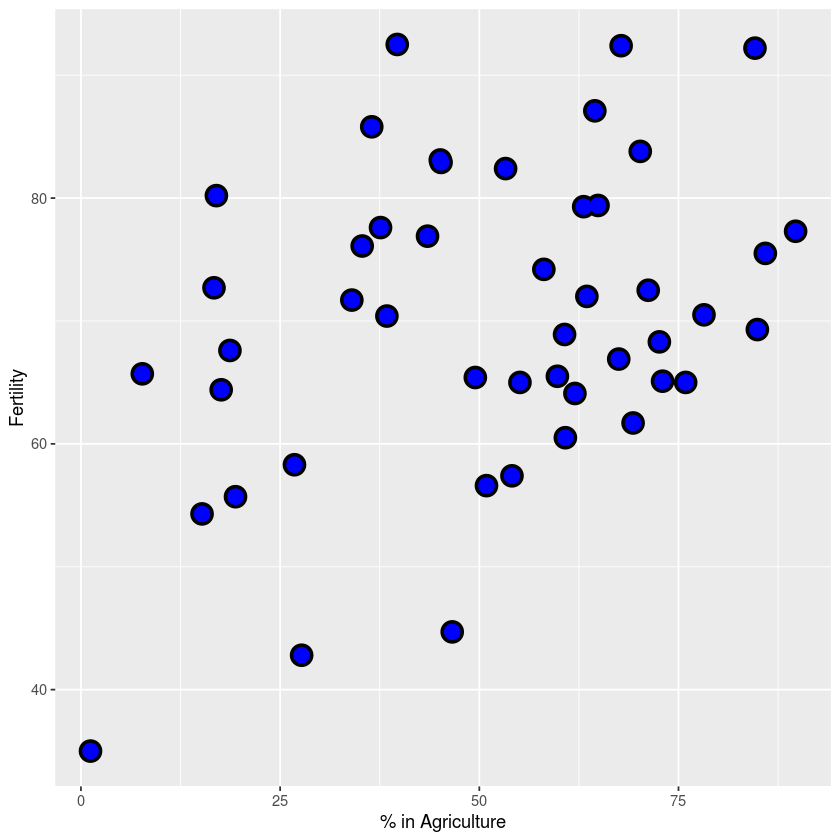

In [32]:
library(ggplot2)
g <- NULL
g <- ggplot(data=swiss
           , aes(x = Agriculture, y = Fertility, Colour = factor(CatholicBin))
           )
g <- g + geom_point(size = 6
                   , colour = 'black'
                   )
g <- g + geom_point(size = 4
                   , colour = 'blue'
                   )
g <- g + xlab("% in Agriculture") + ylab("Fertility")
g

In [35]:
fit <- lm(Fertility ~ Agriculture + factor(CatholicBin), data = swiss)
summary(fit)


Call:
lm(formula = Fertility ~ Agriculture + factor(CatholicBin), data = swiss)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.803  -6.701   1.382   6.855  20.435 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           60.8322     4.1059  14.816   <2e-16 ***
Agriculture            0.1242     0.0811   1.531   0.1329    
factor(CatholicBin)1   7.8843     3.7484   2.103   0.0412 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.39 on 44 degrees of freedom
Multiple R-squared:  0.2046,	Adjusted R-squared:  0.1685 
F-statistic:  5.66 on 2 and 44 DF,  p-value: 0.006492


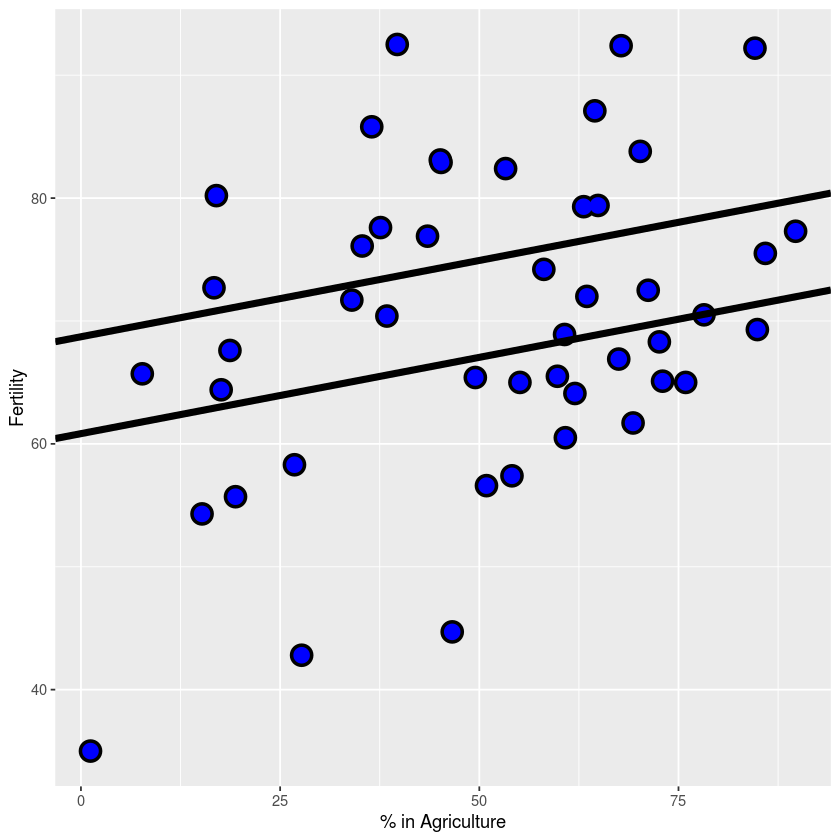

In [36]:
g1 = g
g1 <- g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1 <- g1 + geom_abline(intercept = coef(fit)[1] + coef(fit)[3], slope = coef(fit)[2], size = 2)
g1

In [37]:
fit <- lm(Fertility ~ Agriculture * factor(CatholicBin), data = swiss)
summary(fit)


Call:
lm(formula = Fertility ~ Agriculture * factor(CatholicBin), data = swiss)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.840  -6.668   1.016   7.092  20.242 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      62.04993    4.78916  12.956   <2e-16 ***
Agriculture                       0.09612    0.09881   0.973    0.336    
factor(CatholicBin)1              2.85770   10.62644   0.269    0.789    
Agriculture:factor(CatholicBin)1  0.08914    0.17611   0.506    0.615    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.49 on 43 degrees of freedom
Multiple R-squared:  0.2094,	Adjusted R-squared:  0.1542 
F-statistic: 3.795 on 3 and 43 DF,  p-value: 0.01683


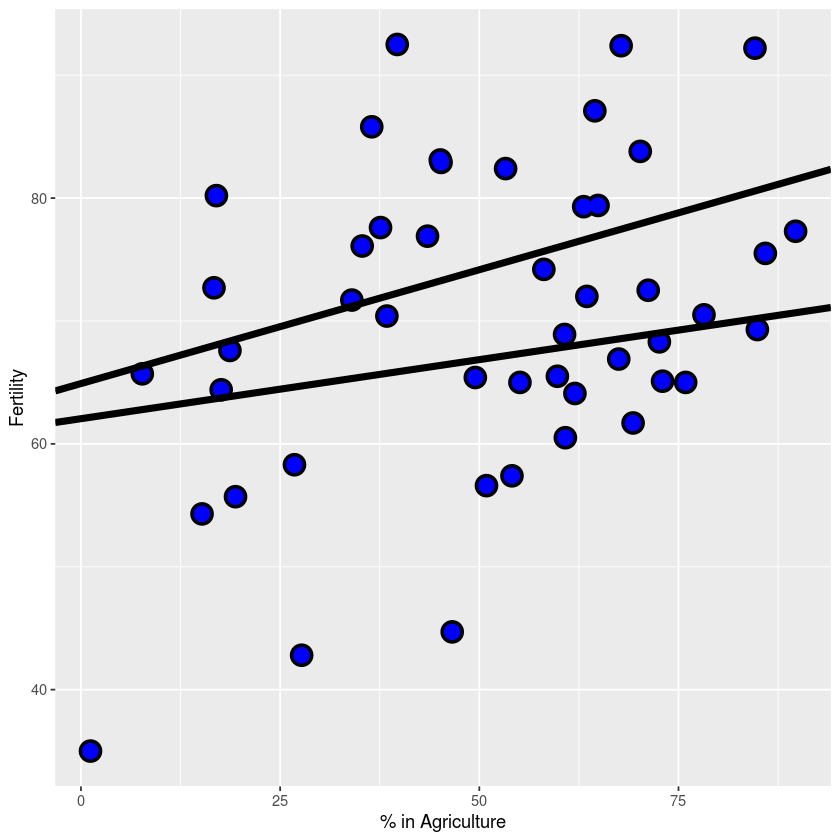

In [39]:
g1 = g
g1 <- g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1 <- g1 + geom_abline(intercept = coef(fit)[1] + coef(fit)[3]
                       , slope = coef(fit)[2] + coef(fit)[4]
                       , size = 2)
g1

## Adjustment

In [42]:
library(rgl)
plot3d(x1, x2, y)

ERROR: Error in plot3d(x1, x2, y): object 'x1' not found
